# Project Name: Rain Prediction

### Rainfall Prediction - Weather Forecasting
Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset available below



Downlaod Files:

    

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

### Reading our data

In [ ]:
rain_data=  pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [ ]:
rain_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Understanding Data

In [ ]:
rain_data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

### Let us devide our variables into different categories

In [ ]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#### Discrete Variable are countable in finit amount of time while numerical variable are to much in number to count

In [ ]:
num_var = [feature for feature in rain_data.columns if rain_data[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(rain_data[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
cat_var = [feature for feature in rain_data.columns if feature not in num_var]

In [ ]:
rain_data[cat_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,E,SE,ENE,No,No
8421,2017-06-22,Uluru,NNW,SE,N,No,No
8422,2017-06-23,Uluru,N,SE,WNW,No,No
8423,2017-06-24,Uluru,SE,SSE,N,No,No


### Handling Missing Values

In [ ]:
rain_data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

## percentage of missing data

In [ ]:
rain_data.isnull().sum()*100/len(rain_data)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [ ]:
def find_var_type(var):
    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [ ]:
find_var_type('Cloud3pm')

Cloud3pm is a Numerical Variable, Discrete in nature


### We will do Ramdom Sample Imputation for the our variables which are having the most percentage of Nul Vlaues

In [ ]:
def RandomSampleImputation(data, feature):
    data[feature]=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    random_sample.index=data[data[feature].isnull()].index
    rain_data.loc[data[feature].isnull(),feature]=random_sample

In [ ]:
RandomSampleImputation(rain_data, "Cloud9am")
RandomSampleImputation(rain_data, "Cloud3pm")
RandomSampleImputation(rain_data, "Evaporation")
RandomSampleImputation(rain_data, "Sunshine")

In [ ]:
rain_data.isnull().sum()*100/len(rain_data)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [ ]:
find_var_type('RainToday')

RainToday is a Categorical Variable


### Then we will replace the null values by mean of all the continuous feature which are having less number of null values

In [ ]:
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [ ]:
MeanImputation(rain_data,'Pressure3pm')
MeanImputation(rain_data, 'Pressure9am')
MeanImputation(rain_data, 'MinTemp')
MeanImputation(rain_data, 'MaxTemp')
MeanImputation(rain_data, 'Rainfall')
MeanImputation(rain_data, 'WindGustSpeed')
MeanImputation(rain_data, 'WindSpeed9am')
MeanImputation(rain_data, 'WindSpeed3pm')
MeanImputation(rain_data, 'Pressure9am')
MeanImputation(rain_data, 'Humidity9am')
MeanImputation(rain_data, 'Humidity3pm')
MeanImputation(rain_data, 'Temp3pm')
MeanImputation(rain_data, 'Temp9am')

In [ ]:
rain_data.isnull().sum()*100/len(rain_data)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

### Now we are left with the categotical varibales only, for these variables we will replace null values later in the Label Encoding part.

### Plotting a HeatMap

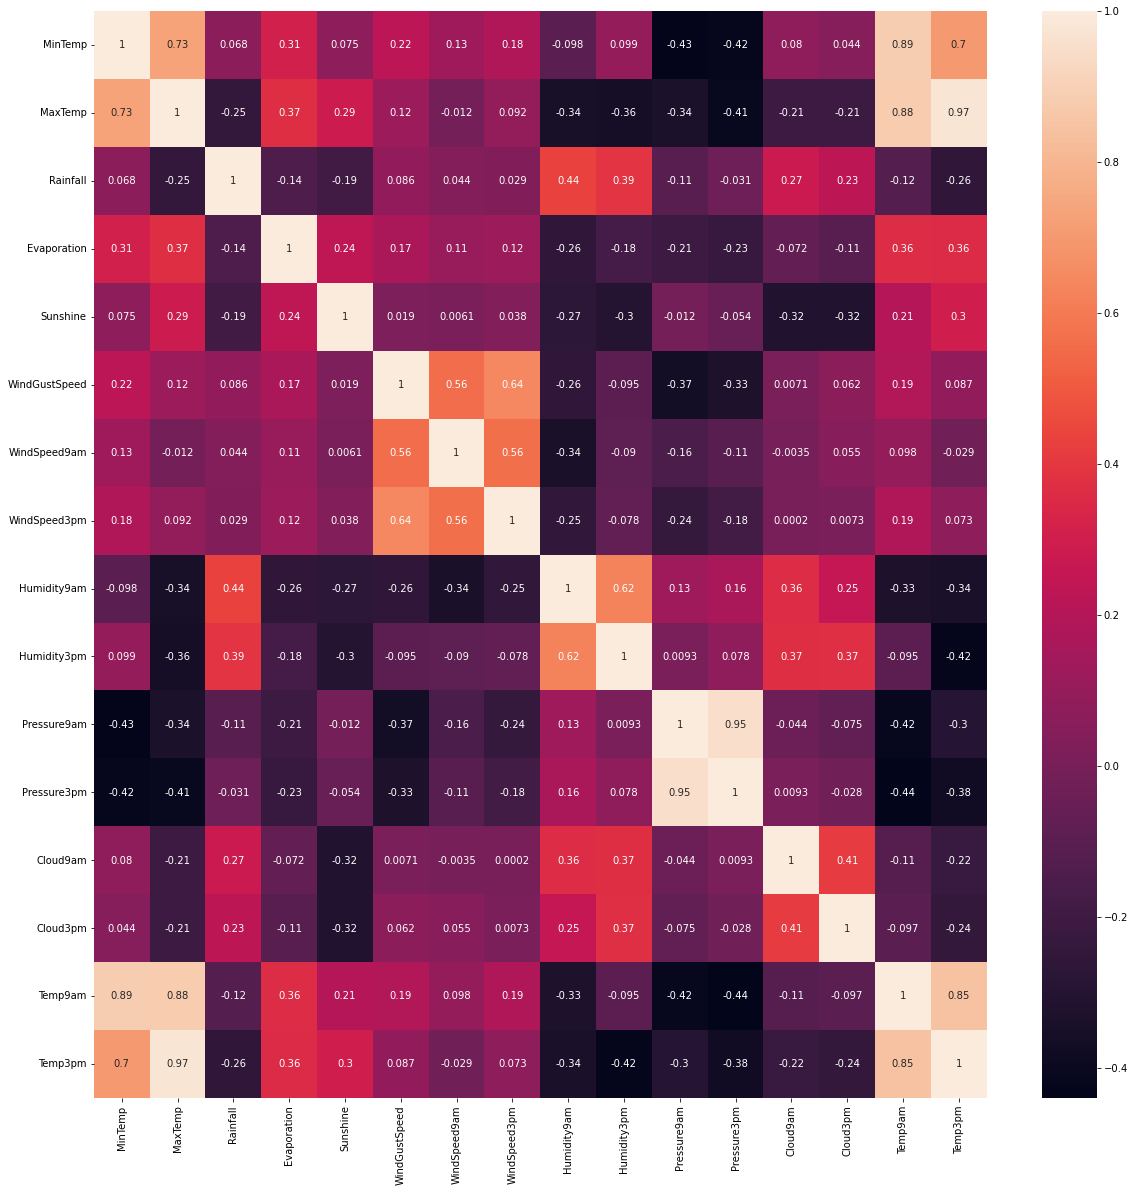

In [ ]:
corrmat = rain_data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

### Analysis for Continuous variables

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


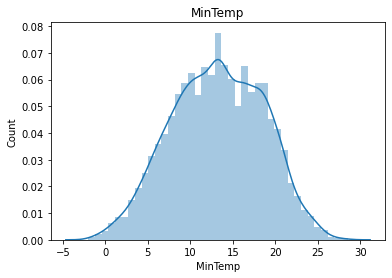

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


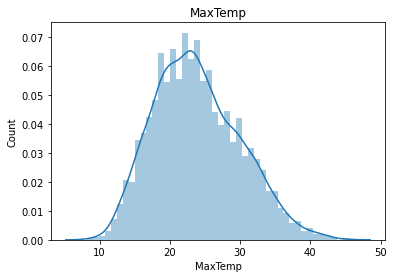

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


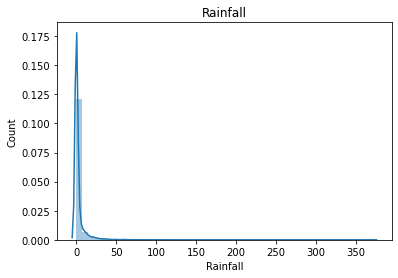

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


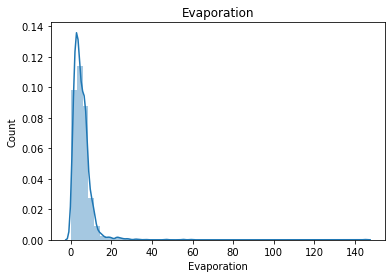

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


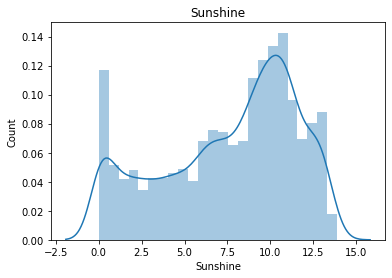

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


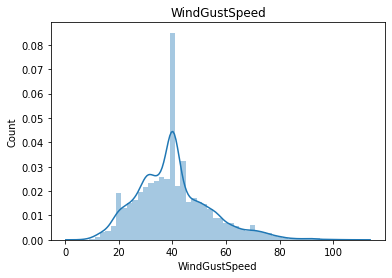

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


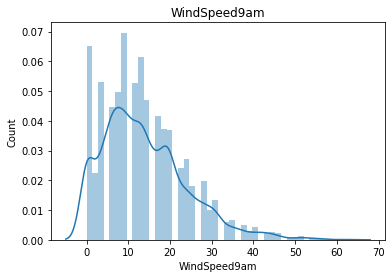

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


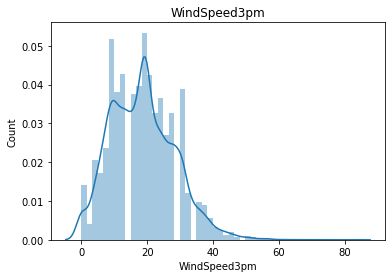

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


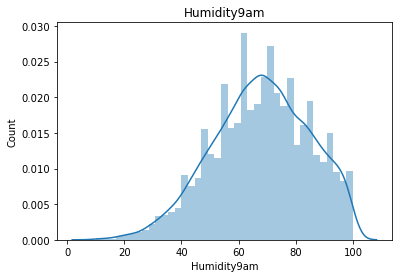

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


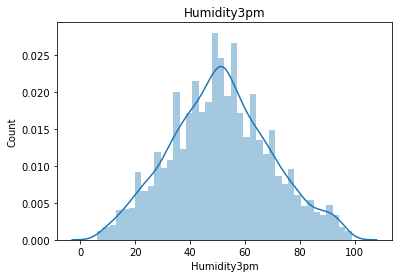

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


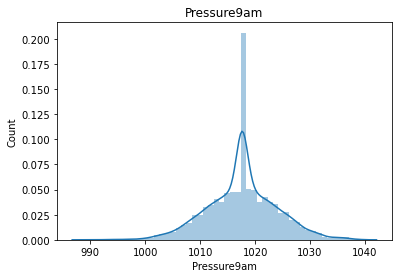

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


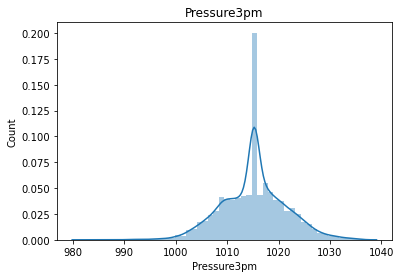

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


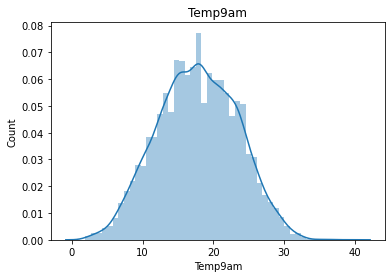

<Figure size 1080x1080 with 0 Axes>

D:\New folder\Android\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


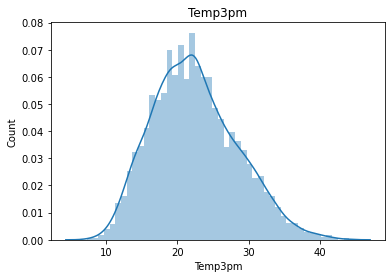

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in cont_var:
    data=rain_data.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

D:\New folder\Android\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\Android\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\Android\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\Android\lib\site-packages\

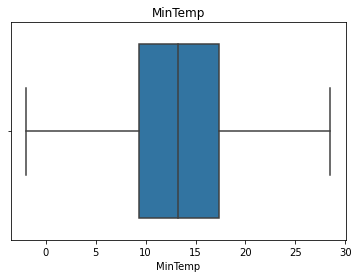

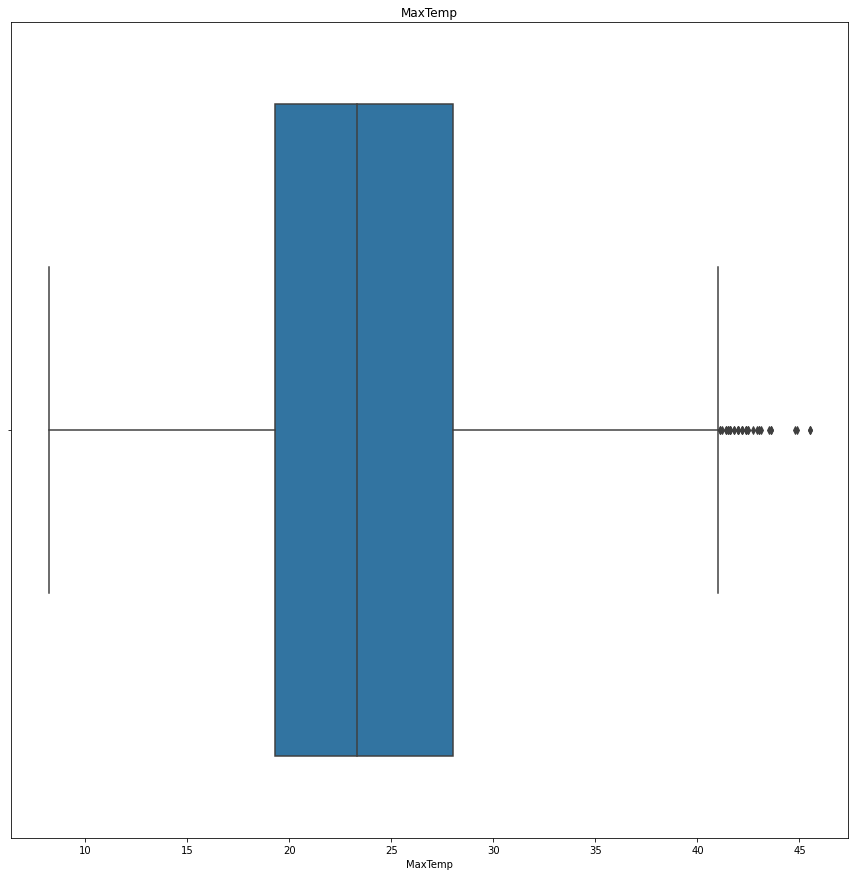

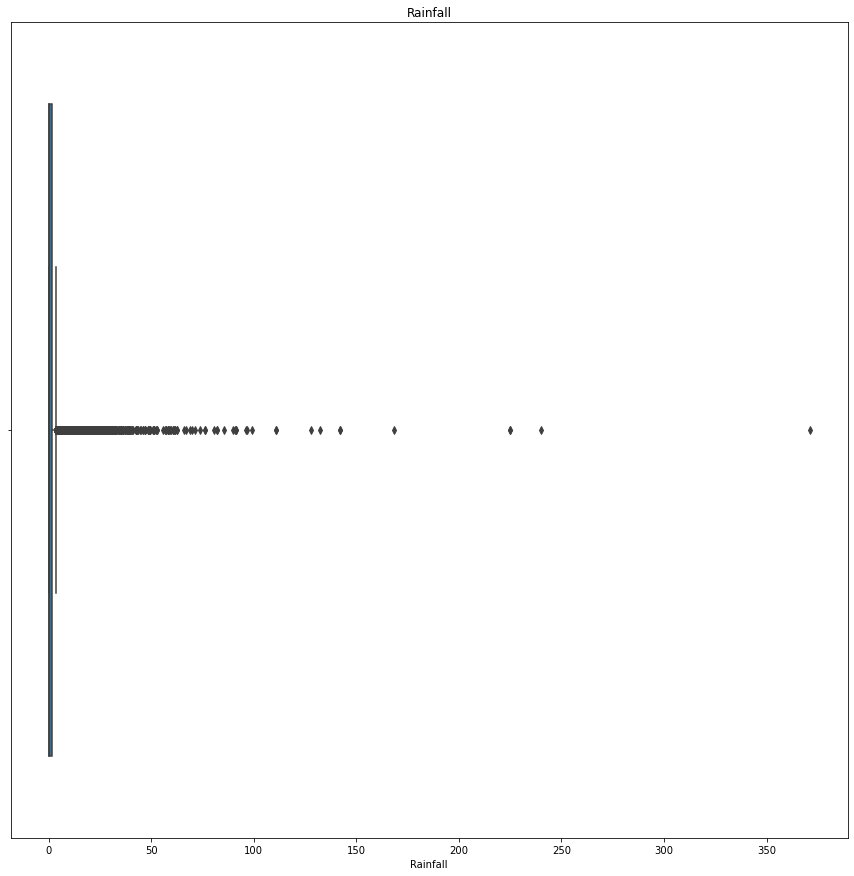

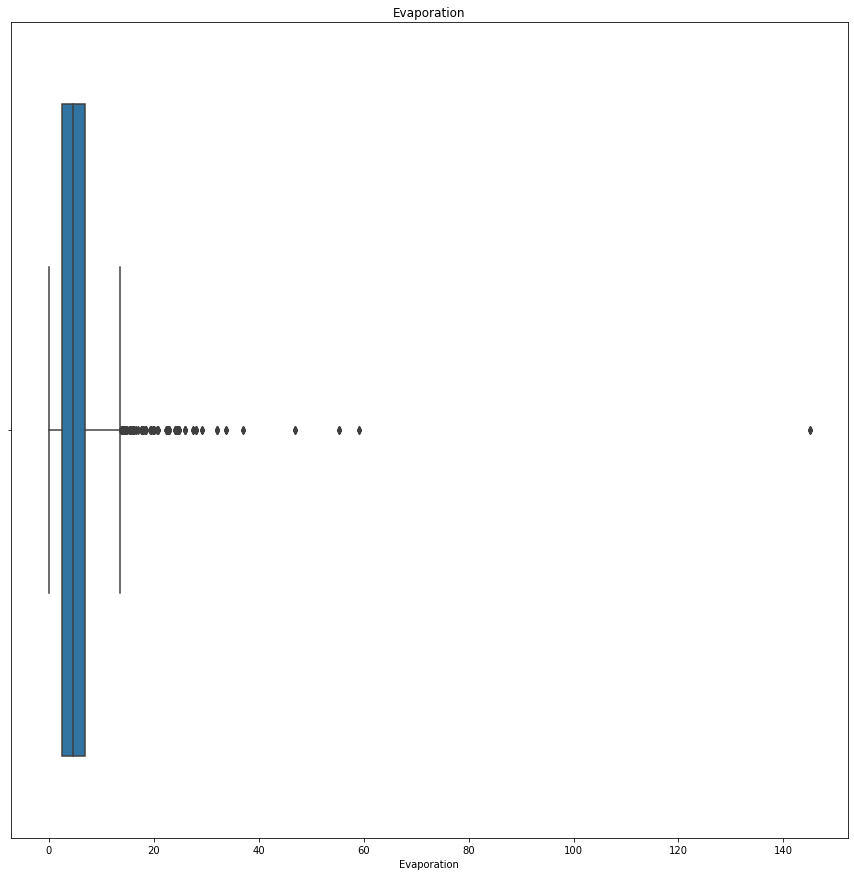

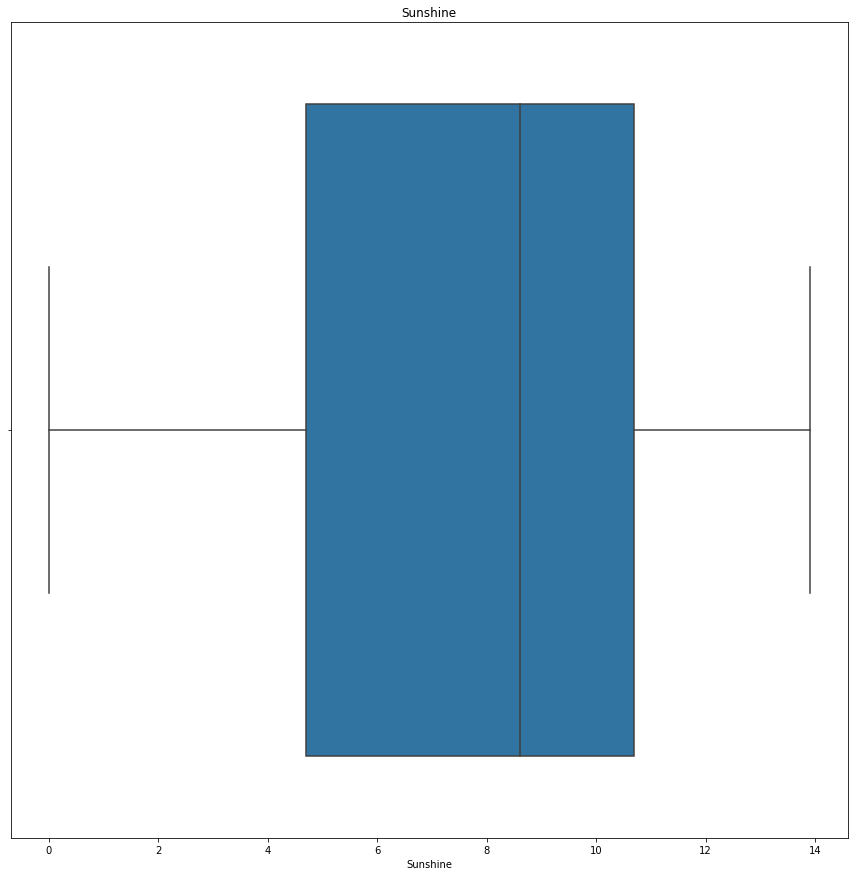

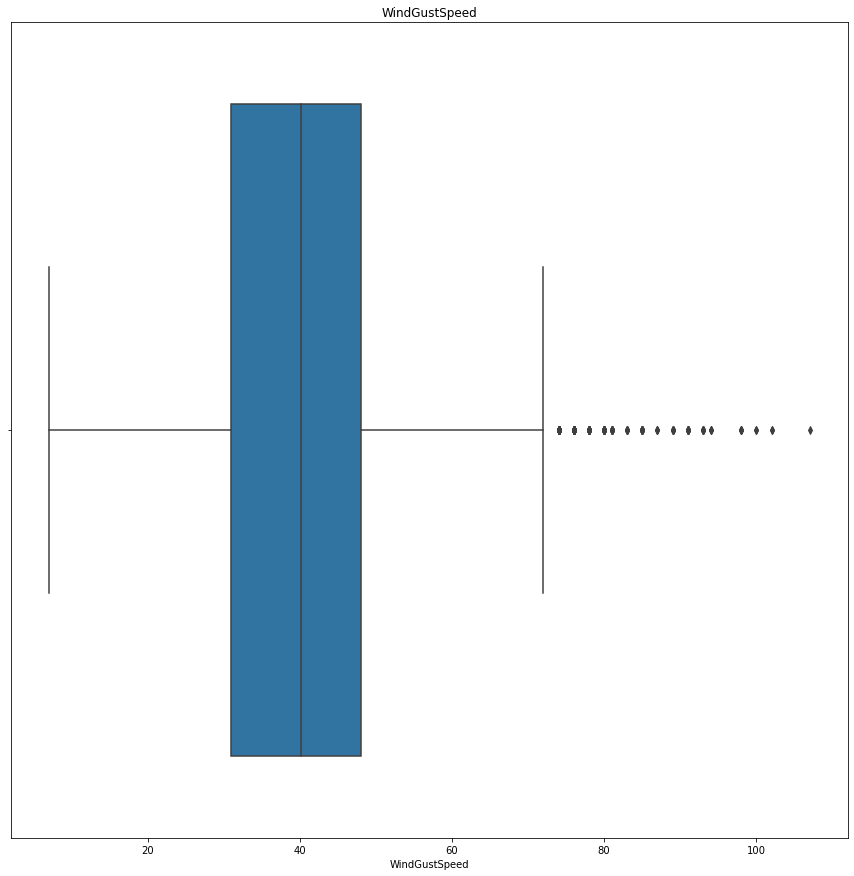

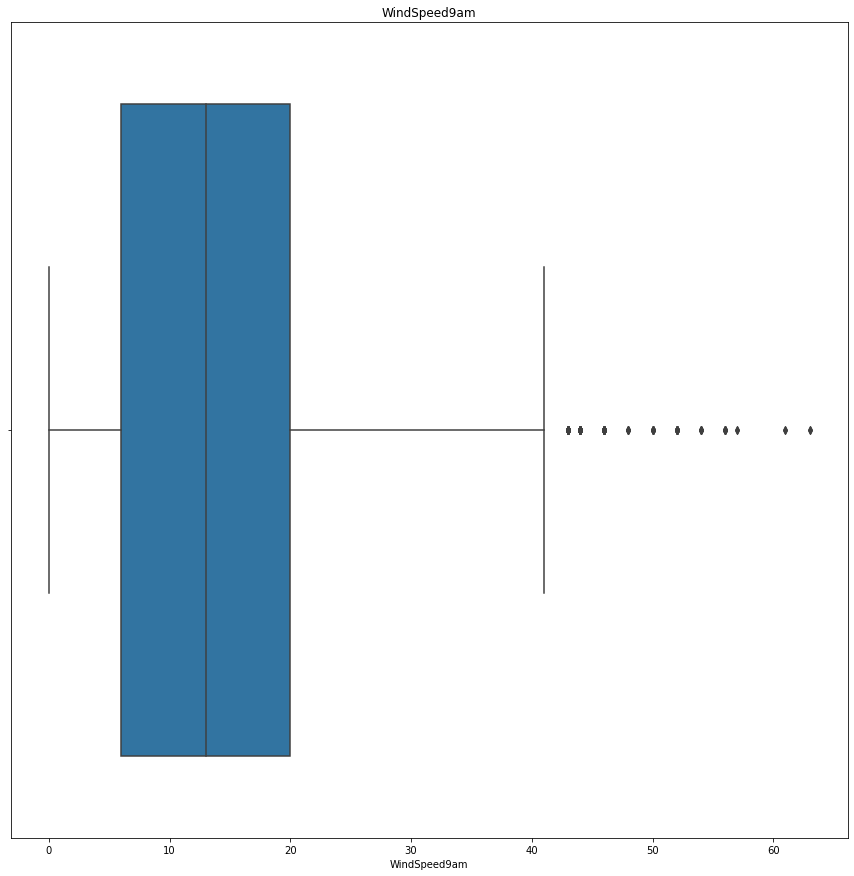

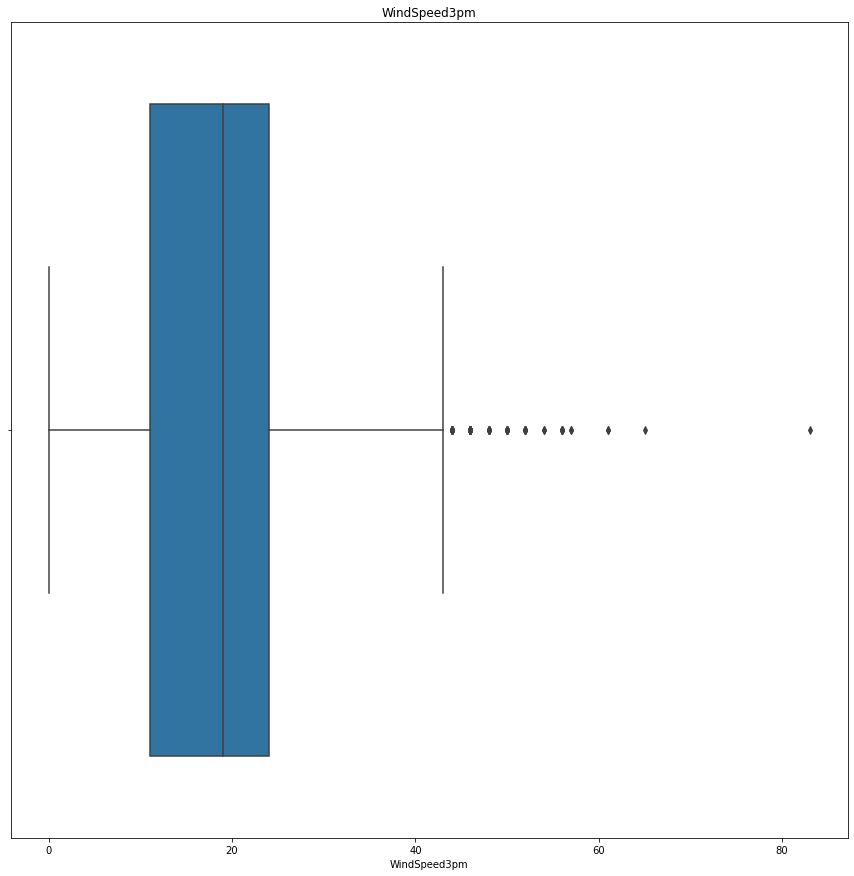

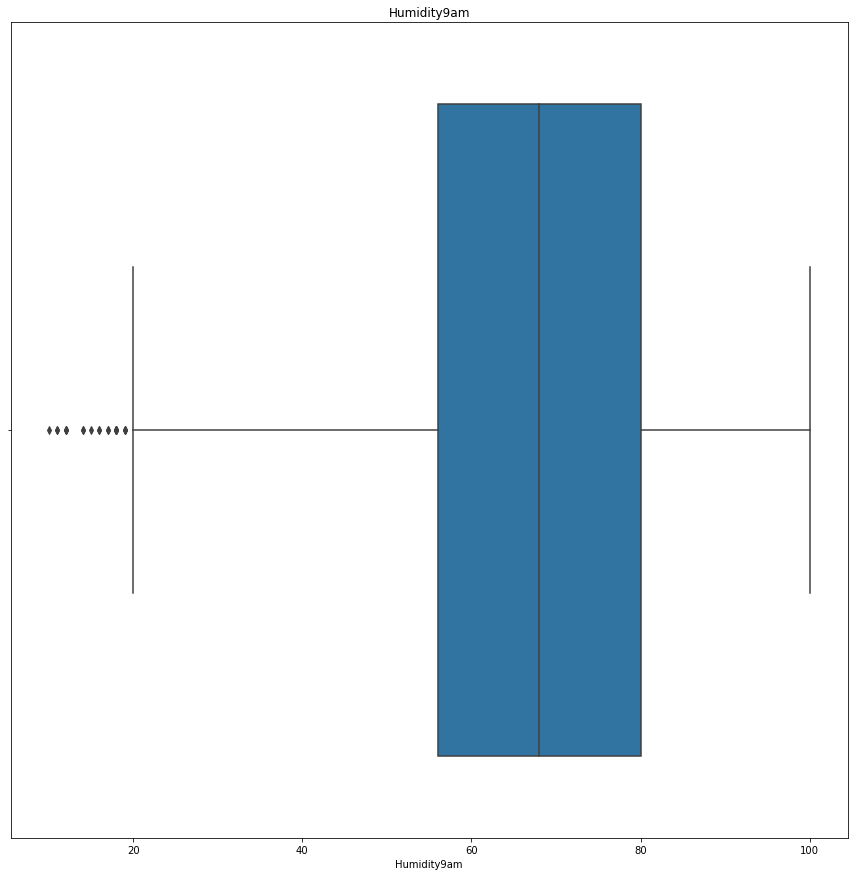

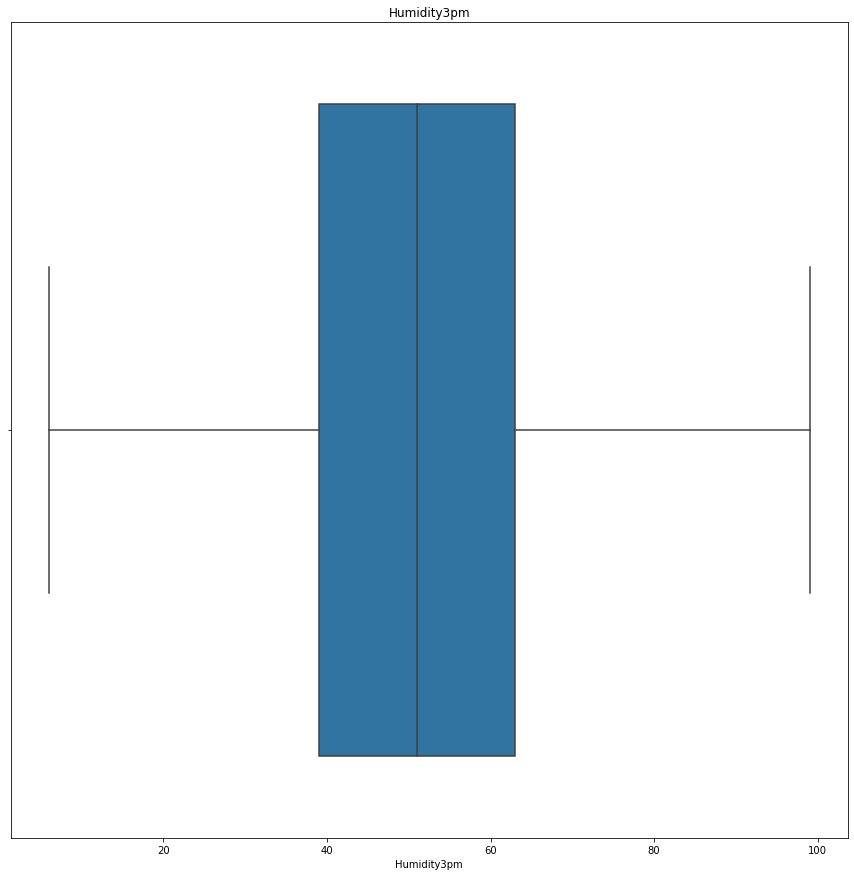

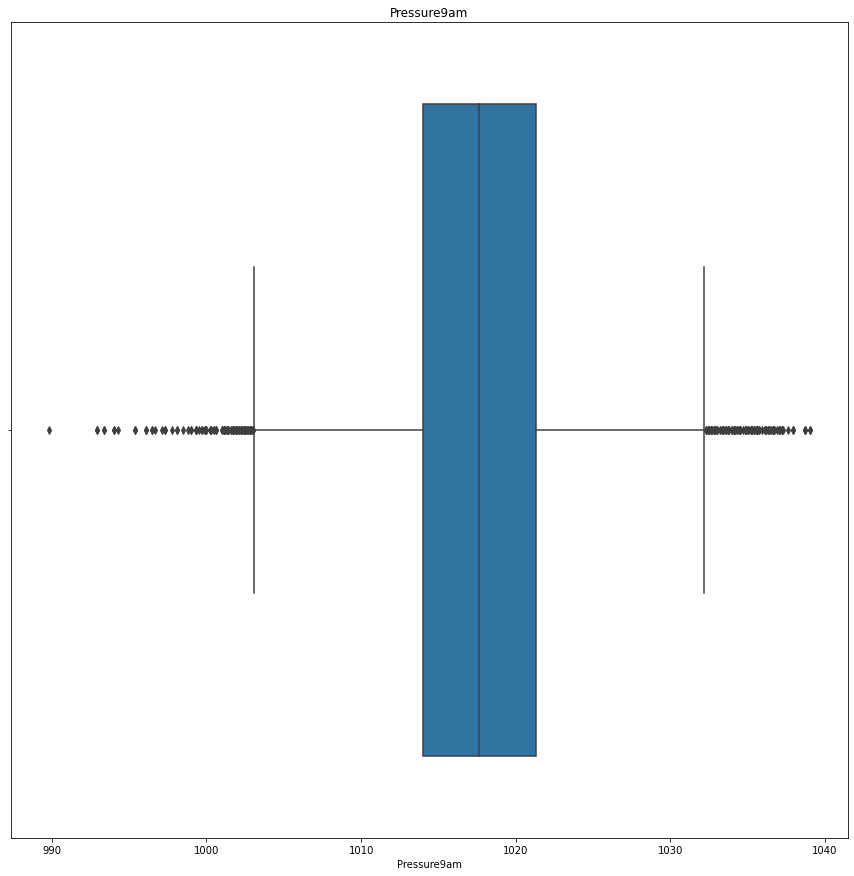

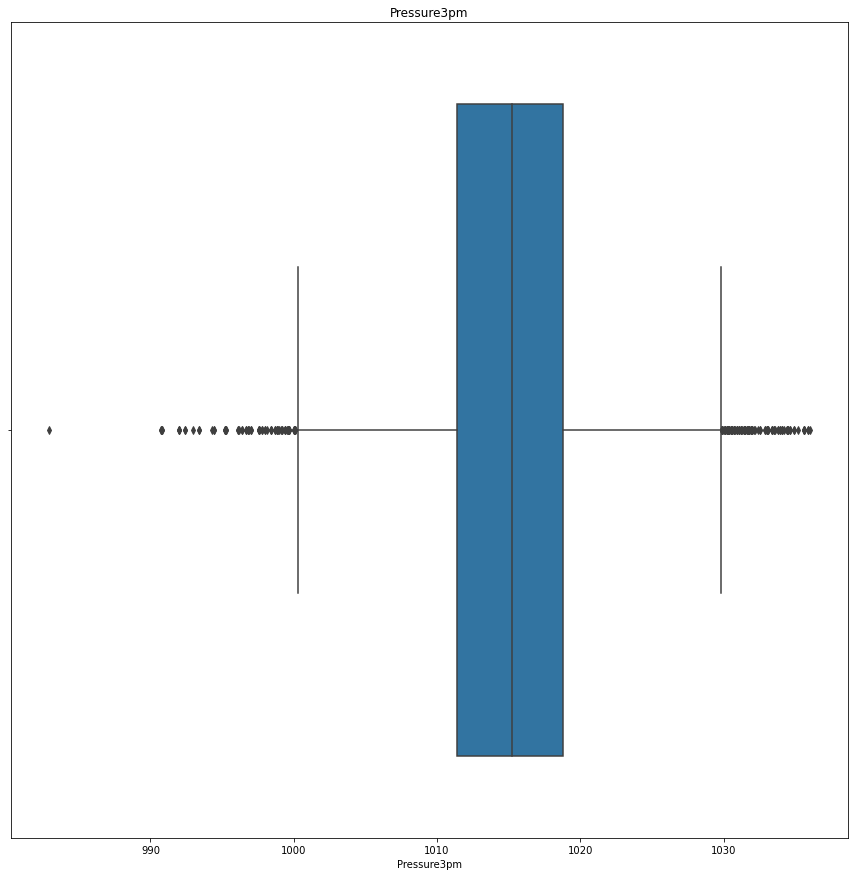

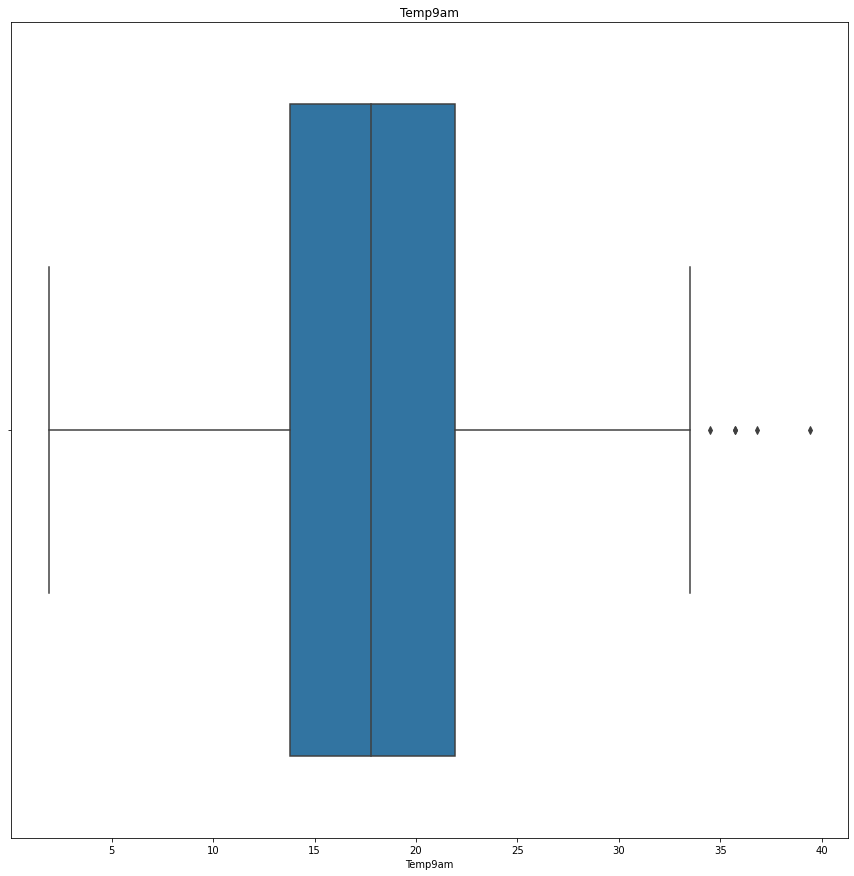

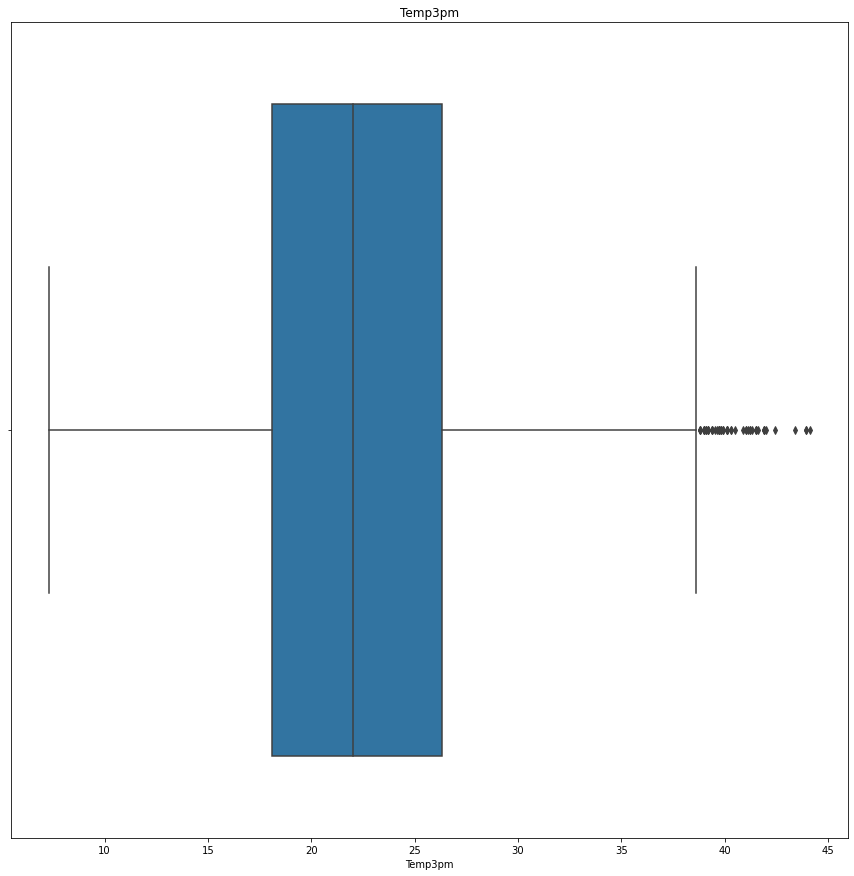

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in cont_var:
    data=rain_data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### One Hot Encoding

In [ ]:
rain_data["RainToday"] = pd.get_dummies(rain_data["RainToday"], drop_first = True)
rain_data["RainTomorrow"] = pd.get_dummies(rain_data["RainTomorrow"], drop_first = True)
rain_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,3.0,13.8,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,2.2,7.6,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,4.6,7.7,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,1.8,8.0,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,3.8,11.9,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,6.4,1.2,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.300000,0.0,12.6,7.1,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.900000,0.0,4.2,13.0,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.000000,0.0,4.0,13.1,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [53]:
### Mapping data

In [ ]:
for feature in cat_var:
    print(feature, (rain_data.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [ ]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
rain_data["WindGustDir"] = rain_data["WindGustDir"].map(windgustdir)
rain_data["WindDir9am"] = rain_data["WindDir9am"].map(winddir9am)
rain_data["WindDir3pm"] = rain_data["WindDir3pm"].map(winddir3pm)

In [ ]:
## replacing null value by mode
rain_data["WindGustDir"] = rain_data["WindGustDir"].fillna(rain_data["WindGustDir"].mode().index[0])
rain_data["WindDir9am"] = rain_data["WindDir9am"].fillna(rain_data["WindDir9am"].mode().index[0])
rain_data["WindDir3pm"] = rain_data["WindDir3pm"].fillna(rain_data["WindDir3pm"].mode().index[0])

In [ ]:
rain_data.isnull().sum()*100/len(rain_data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [ ]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


### We have removed all the null values and handeled with categorical data

### Now we will do the Label Encoding for our Location according to our Target variable

In [ ]:
df_loc = rain_data.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [ ]:
df_loc.head()

RainTomorrow,0,1
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0


In [ ]:
df_loc[1].sort_values(ascending = False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [ ]:
df_loc[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [ ]:
len(df_loc[1].sort_values(ascending = False).index)

12

### Mapping Data

In [ ]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
rain_data["Location"] = rain_data["Location"].map(mapped_location)

## Feature Engineer

In [ ]:
rain_data["Date"] = pd.to_datetime(rain_data["Date"], format = "%Y-%m-%dT", errors = "coerce")
rain_data["Date_month"] = rain_data["Date"].dt.month
rain_data["Date_day"] = rain_data["Date"].dt.day

In [ ]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,...,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,...,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,...,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,...,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


D:\New folder\Android\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

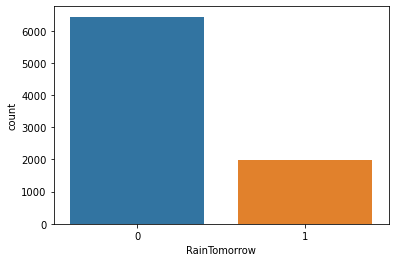

In [ ]:
sns.countplot(rain_data["RainTomorrow"])

In [ ]:
rain_data.drop(['Date'],axis=1,inplace=True)

In [ ]:
rain_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,...,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,...,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,...,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,...,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stats
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

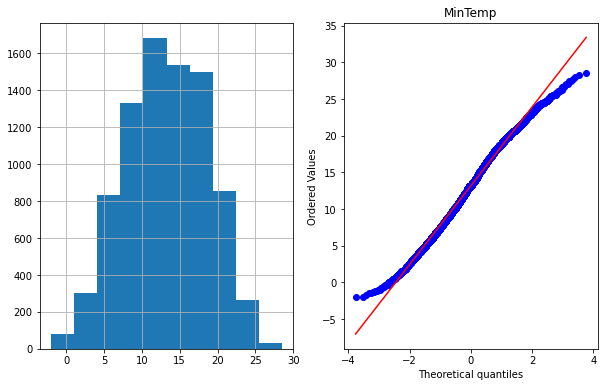

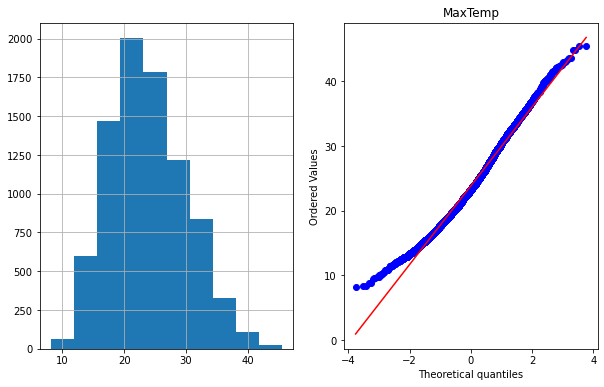

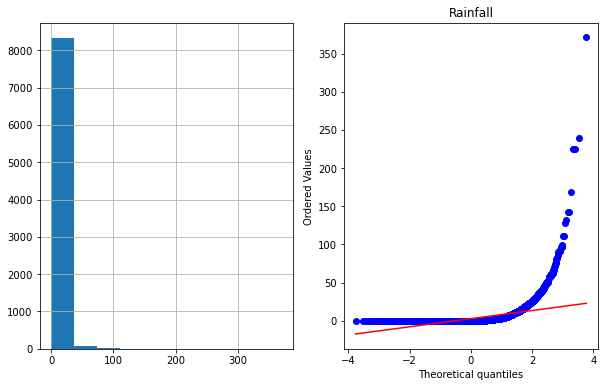

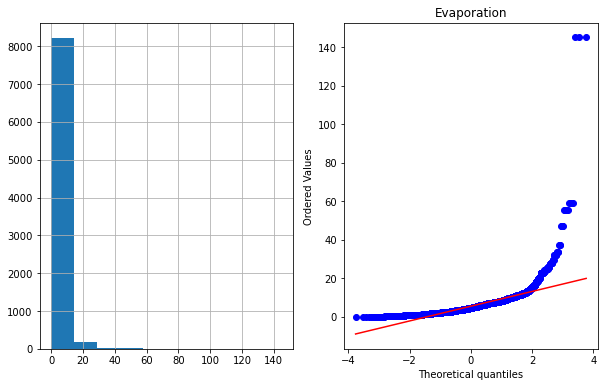

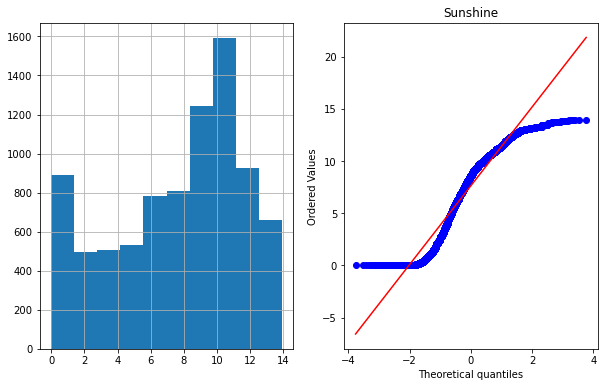

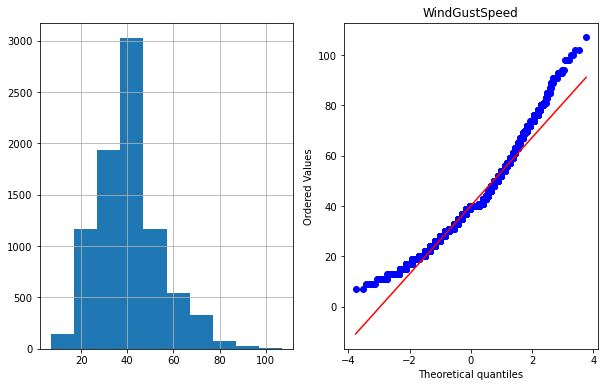

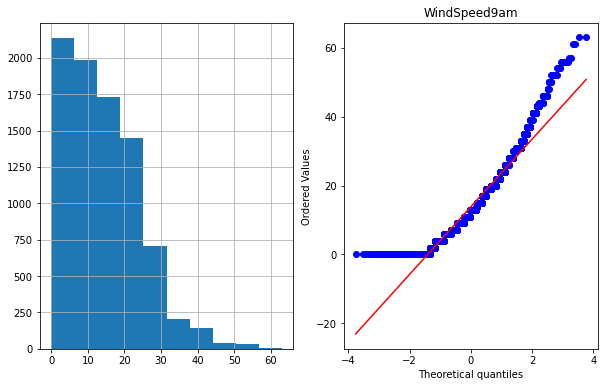

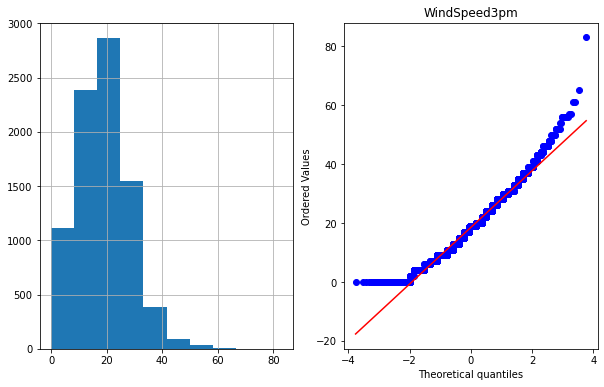

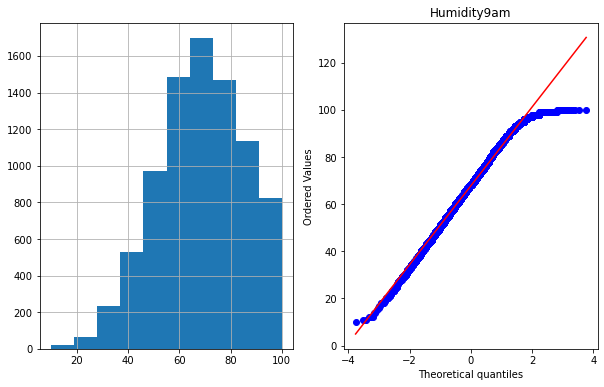

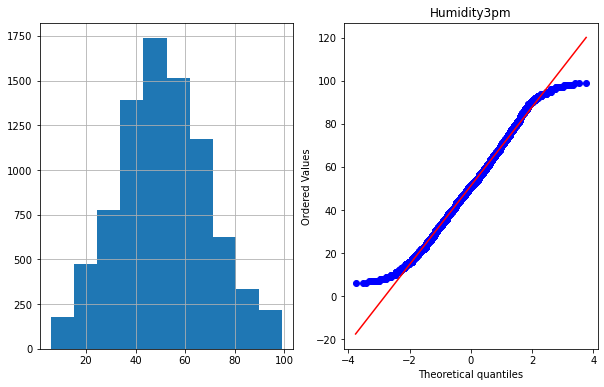

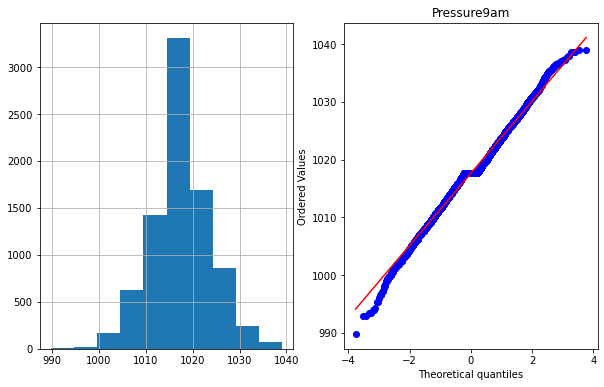

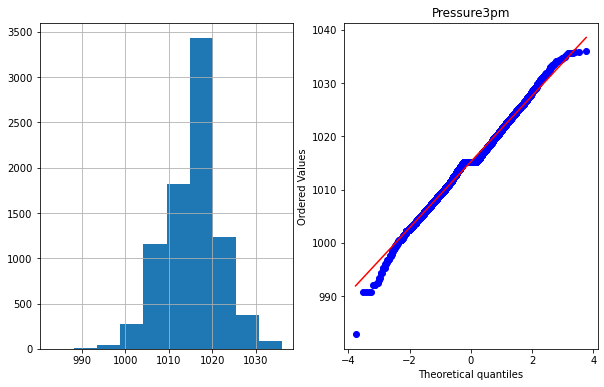

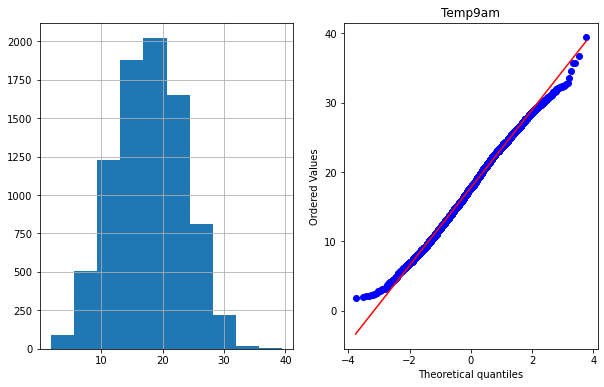

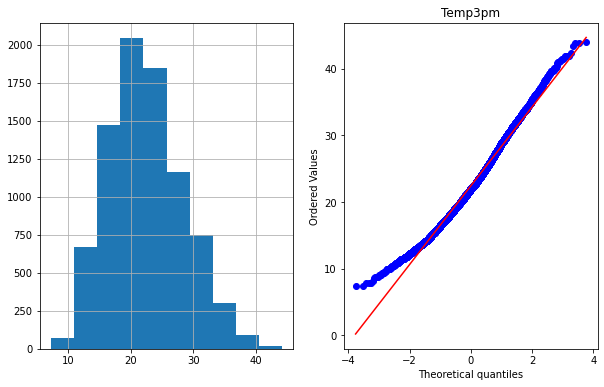

In [ ]:
for i in cont_var:
    plot_curve(rain_data, i)

# Feature Selection

In [ ]:
features= rain_data.drop(["RainTomorrow"], axis=1)
target= rain_data["RainTomorrow"]

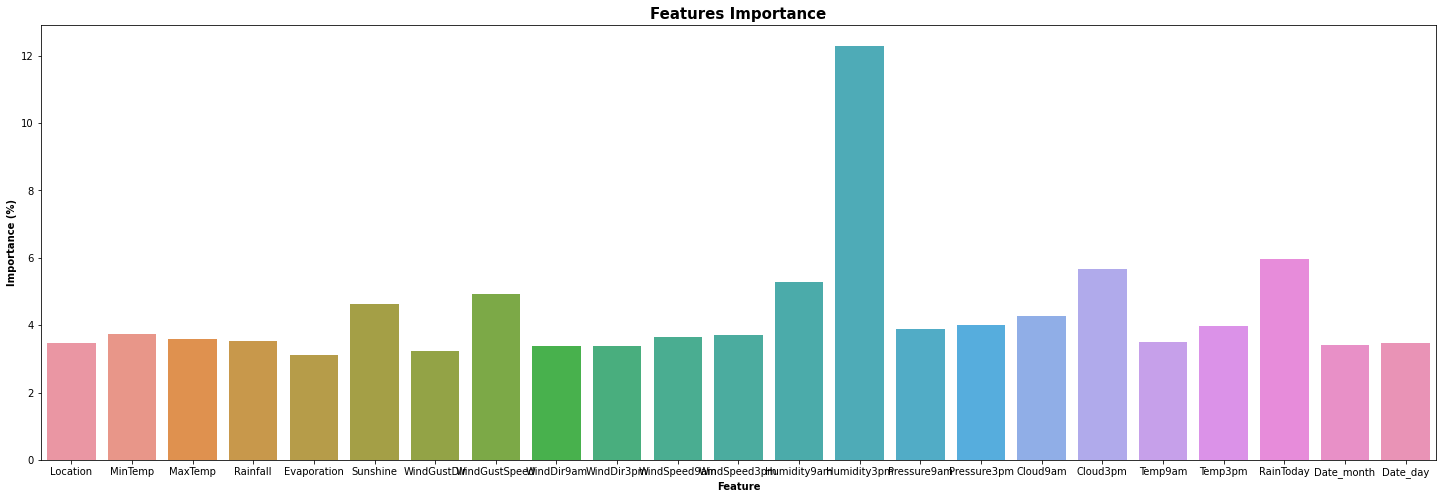

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
clf.fit(features, target)
feat_import = pd.DataFrame(zip(features.columns.tolist(), clf.feature_importances_ * 100), columns=['Feature', 'Importance'])
# Features importance plot
plt.figure(figsize=[25,8])
sns.barplot(data=feat_import, x='Feature', y='Importance')
plt.title('Features Importance', weight='bold', fontsize=15)
plt.xlabel('Feature', weight='bold', fontsize=10)
plt.ylabel('Importance (%)', weight='bold', fontsize=10);

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
for col in features.columns:
    SC = StandardScaler()
    features[col] = SC.fit_transform(features[col].values.reshape(-1, 1))

## # Checking for Imbalace in the data

In [ ]:
round(target.value_counts(normalize=True) * 100, 2)

0    76.37
1    23.63
Name: RainTomorrow, dtype: float64

# Random Sampling

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

ROS = SMOTE(random_state=12)
ROS.fit(features, target)
features_resampled, target_resampled = ROS.fit_resample(features,target)
round(target_resampled.value_counts(normalize=True) * 100, 2)

0    50.0
1    50.0
Name: RainTomorrow, dtype: float64

In [ ]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Model Building and Evaluation

In [ ]:
def Model_Building(Features,target,model):
    Maximum_Accuracy=0

    test_size=[0.2,0.25,0.3]
    for j in test_size:
        for i in range(100):
            x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=i)
            model.fit(x_train,y_train)
            pred= model.predict(x_test)
            acc=accuracy_score(y_test,pred)
            check=model.predict(x_train)
            check_acc=accuracy_score(y_train,check)
            
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)


## Logistic Regression

In [ ]:
Model_Building(features_resampled, target_resampled,LogisticRegression(solver="liblinear", random_state=1))

Test set accuracy 0.7797202797202797 Train set accuracy 0.7665630464348164 Random state 0 test_size 0.2
Test set accuracy 0.7843822843822844 Train set accuracy 0.7647173110549835 Random state 1 test_size 0.2
Test set accuracy 0.7940947940947941 Train set accuracy 0.763551583446668 Random state 36 test_size 0.2


Accuracy of Logistic Regression: 79.41%
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1295
           1       0.81      0.77      0.79      1279

    accuracy                           0.79      2574
   macro avg       0.79      0.79      0.79      2574
weighted avg       0.79      0.79      0.79      2574



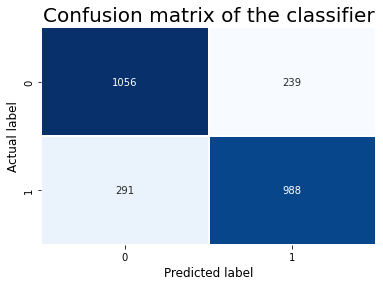

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=36)
LR =LogisticRegression(solver="liblinear", random_state=1)

LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)

# calculate accuracy score
LR_accuracy = accuracy_score(y_test, pred_LR)
print('Accuracy of Logistic Regression: {:.2f}%'.format(LR_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_LR)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
LR_pred_prob = LR.predict_proba(x_test)[:, 1]
LR_roc_auc = roc_auc_score(y_test, LR_pred_prob)

## KNN Regression

In [ ]:
Model_Building(features_resampled, target_resampled,KNeighborsClassifier())

Test set accuracy 0.8651903651903652 Train set accuracy 0.9002331455216631 Random state 0 test_size 0.2
Test set accuracy 0.8682983682983683 Train set accuracy 0.9060617835632407 Random state 9 test_size 0.2
Test set accuracy 0.8733488733488733 Train set accuracy 0.9051874878570041 Random state 15 test_size 0.2
Test set accuracy 0.8749028749028749 Train set accuracy 0.9029531766077327 Random state 36 test_size 0.2


Accuracy of KNN CLASSIFIER: 87.49%
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1295
           1       0.82      0.96      0.88      1279

    accuracy                           0.87      2574
   macro avg       0.89      0.88      0.87      2574
weighted avg       0.89      0.87      0.87      2574



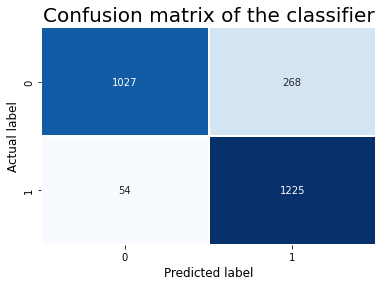

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=36)
KNN =KNeighborsClassifier()

KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

# calculate accuracy score
KNN_accuracy = accuracy_score(y_test, pred_KNN)
print('Accuracy of KNN CLASSIFIER: {:.2f}%'.format(KNN_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_KNN)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_KNN)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
KNN_pred_prob = KNN.predict_proba(x_test)[:, 1]
KNN_roc_auc = roc_auc_score(y_test, KNN_pred_prob)

# Naive Bayes Classifier

In [ ]:
Model_Building(features_resampled, target_resampled,GaussianNB())

Test set accuracy 0.7556332556332557 Train set accuracy 0.7403341752477172 Random state 0 test_size 0.2
Test set accuracy 0.7622377622377622 Train set accuracy 0.7369341363901302 Random state 1 test_size 0.2
Test set accuracy 0.7672882672882673 Train set accuracy 0.738002720031086 Random state 36 test_size 0.2


Accuracy of GUSSIAN NAIVE BAYES: 76.73%
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1295
           1       0.79      0.72      0.76      1279

    accuracy                           0.77      2574
   macro avg       0.77      0.77      0.77      2574
weighted avg       0.77      0.77      0.77      2574



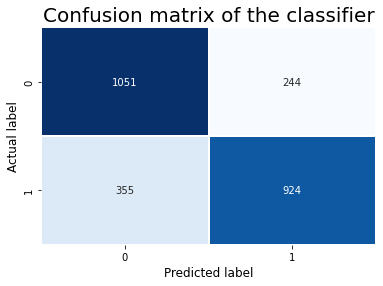

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=36)
GNB =GaussianNB()

GNB.fit(x_train, y_train)
pred_GNB = GNB.predict(x_test)

# calculate accuracy score
GNB_accuracy = accuracy_score(y_test, pred_GNB)
print('Accuracy of GUSSIAN NAIVE BAYES: {:.2f}%'.format(GNB_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_GNB)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_GNB)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
GNB_pred_prob = GNB.predict_proba(x_test)[:, 1]
GNB_roc_auc = roc_auc_score(y_test, GNB_pred_prob)

# Random Forest Classifier

In [ ]:
Model_Building(features_resampled, target_resampled,RandomForestClassifier(random_state=42))

Test set accuracy 0.9456099456099456 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.9463869463869464 Train set accuracy 1.0 Random state 87 test_size 0.2


Accuracy of RANDOM FOREST: 94.64%
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1266
           1       0.95      0.95      0.95      1308

    accuracy                           0.95      2574
   macro avg       0.95      0.95      0.95      2574
weighted avg       0.95      0.95      0.95      2574



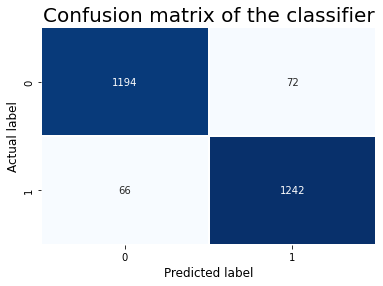

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=87)
RF =RandomForestClassifier(random_state=42)

RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

# calculate accuracy score
RF_accuracy = accuracy_score(y_test, pred_RF)
print('Accuracy of RANDOM FOREST: {:.2f}%'.format(RF_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_RF)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
RF_pred_prob = RF.predict_proba(x_test)[:, 1]
RF_roc_auc = roc_auc_score(y_test, RF_pred_prob)

# Decision Tree Classifier

In [ ]:
Model_Building(features_resampled, target_resampled,DecisionTreeClassifier(random_state=42))

Test set accuracy 0.8679098679098679 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.8725718725718725 Train set accuracy 1.0 Random state 5 test_size 0.2
Test set accuracy 0.8745143745143745 Train set accuracy 1.0 Random state 9 test_size 0.2
Test set accuracy 0.8846153846153846 Train set accuracy 1.0 Random state 17 test_size 0.2


Accuracy of DECISION TREE: 87.84%
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1305
           1       0.87      0.89      0.88      1269

    accuracy                           0.88      2574
   macro avg       0.88      0.88      0.88      2574
weighted avg       0.88      0.88      0.88      2574



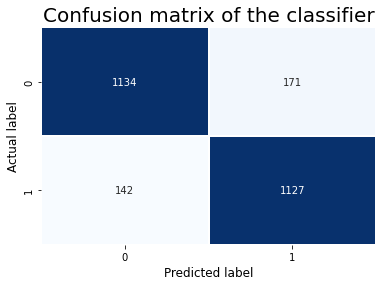

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=17)
DT =DecisionTreeClassifier()

DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)

# calculate accuracy score
DT_accuracy = accuracy_score(y_test, pred_DT)
print('Accuracy of DECISION TREE: {:.2f}%'.format(DT_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_DT)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_DT)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
DT_pred_prob = DT.predict_proba(x_test)[:, 1]
DT_roc_auc = roc_auc_score(y_test, DT_pred_prob)

# ADA Boost Clasifier


In [ ]:
Model_Building(features_resampled, target_resampled,AdaBoostClassifier())


Test set accuracy 0.8135198135198135 Train set accuracy 0.8151350301146298 Random state 0 test_size 0.2
Test set accuracy 0.8158508158508159 Train set accuracy 0.8191179327763746 Random state 1 test_size 0.2
Test set accuracy 0.8174048174048174 Train set accuracy 0.8195065086458131 Random state 7 test_size 0.2
Test set accuracy 0.820901320901321 Train set accuracy 0.8169807654944627 Random state 11 test_size 0.2
Test set accuracy 0.8286713286713286 Train set accuracy 0.8206722362541287 Random state 18 test_size 0.2
Test set accuracy 0.8302253302253302 Train set accuracy 0.8131921507674373 Random state 36 test_size 0.2


Accuracy of ADA BOOST CLASSIFIER: 83.02%
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1295
           1       0.83      0.82      0.83      1279

    accuracy                           0.83      2574
   macro avg       0.83      0.83      0.83      2574
weighted avg       0.83      0.83      0.83      2574



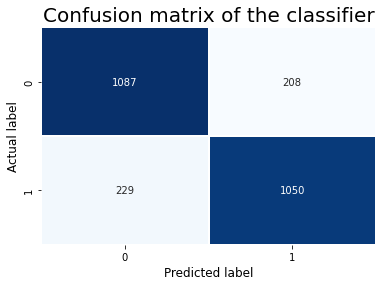

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=36)
ADA =AdaBoostClassifier()

ADA.fit(x_train, y_train)
pred_ADA = ADA.predict(x_test)

# calculate accuracy score
ADA_accuracy = accuracy_score(y_test, pred_ADA)
print('Accuracy of ADA BOOST CLASSIFIER: {:.2f}%'.format(ADA_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_ADA)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_ADA)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
ADA_pred_prob = ADA.predict_proba(x_test)[:, 1]
ADA_roc_auc = roc_auc_score(y_test, ADA_pred_prob)

## Support Vector Classifier

In [ ]:
def Model_Build(Features,target,model):
    Maximum_Accuracy=0

    test_size=[0.2,0.25,0.3]
    for j in test_size:
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=42)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=accuracy_score(y_train,check)
            
        if acc>Maximum_Accuracy:
            Maximum_Accuracy=acc
            print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'test_size',j)

Model_Build(features_resampled, target_resampled,SVC())

Test set accuracy 0.8566433566433567 Train set accuracy 0.8728385467262483 test_size 0.2


Accuracy of SUPPORT VECTOR MACHINE: 85.66%
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1281
           1       0.85      0.86      0.86      1293

    accuracy                           0.86      2574
   macro avg       0.86      0.86      0.86      2574
weighted avg       0.86      0.86      0.86      2574



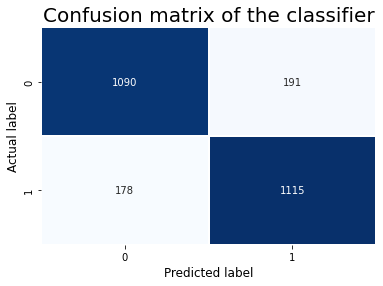

In [ ]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled,test_size=0.2,random_state=42)
SVM =SVC()

SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)

# calculate accuracy score
SVM_accuracy = accuracy_score(y_test, pred_SVM)
print('Accuracy of SUPPORT VECTOR MACHINE: {:.2f}%'.format(SVM_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_SVM)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_SVM)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

## SVM DOESNOT SUPPORT AUC CURVE

## Comparision by Roc_Auc curve

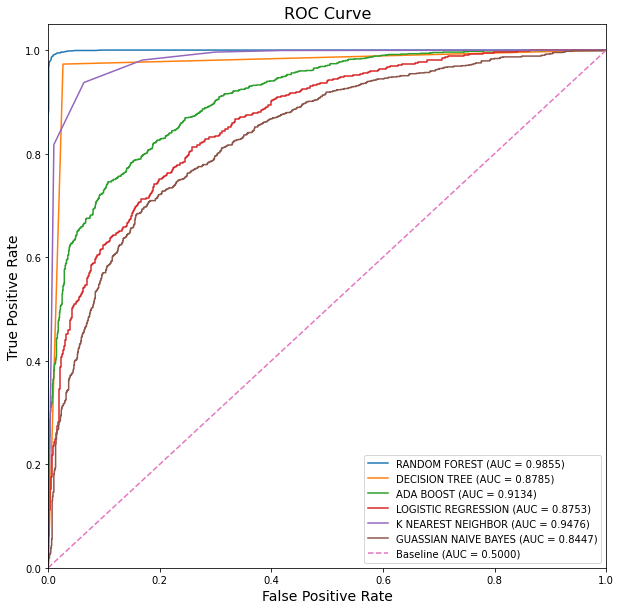

In [ ]:
# create ROC curves

from sklearn.metrics import roc_curve
## RANDOM FOREST
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])

## DECISION TREE
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT.predict_proba(x_test)[:,1])

## ADA BOOST
ADA_fpr, ADA_tpr, ADA_thresholds = roc_curve(y_test, ADA.predict_proba(x_test)[:,1])

## LOGISTIC REGRESSION
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

## K NEAREST NEIGHBOUR
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])

## GUASSIAN NAIVE BAYES 
GNB_fpr, GNB_tpr, GNB_thresholds = roc_curve(y_test, GNB.predict_proba(x_test)[:,1])

plt.figure(figsize=(10, 10))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="RANDOM FOREST (AUC = {:1.4f})".format(RF_roc_auc))
plt.plot(DT_fpr, DT_tpr, label="DECISION TREE (AUC = {:1.4f})".format(DT_roc_auc))
plt.plot(ADA_fpr, ADA_tpr, label="ADA BOOST (AUC = {:1.4f})".format(ADA_roc_auc))
plt.plot(LR_fpr, LR_tpr, label="LOGISTIC REGRESSION (AUC = {:1.4f})".format(LR_roc_auc))
plt.plot(KNN_fpr, KNN_tpr, label="K NEAREST NEIGHBOR (AUC = {:1.4f})".format(KNN_roc_auc))
plt.plot(GNB_fpr, GNB_tpr, label="GUASSIAN NAIVE BAYES (AUC = {:1.4f})".format(GNB_roc_auc))

# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

# picking Random Forest Alogrithm for Hypertuning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=87)
rf = RandomForestClassifier()

param_grid = { 'max_depth': [2,5,None],
 'min_samples_leaf': [2,3],
 'min_samples_split': [1,2,3],
 'n_estimators': [100,200,300,400],
 'max_features': ['sqrt','log2', None]
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv=5)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_

print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

D:\New folder\Android\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\New folder\Android\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
  File "D:\New folder\Android\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    "len(estimators_)=%d when warm_start==True"
  File "D:\New folder\Android\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\New folder\Android\lib\site-packages\joblib\parallel.py", line 861, in disp

best estimator: RandomForestClassifier(min_samples_leaf=2, min_samples_split=3,
                       n_estimators=400)
best params: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 400}
best score: 0.9105313088948893


In [ ]:
rf = RandomForestClassifier(random_state=87,max_depth= None, max_features =None,min_samples_leaf=2, min_samples_split=5, n_estimators=400)

grid_fit = rf.fit(x_train, y_train)
# make predictions

pred_rf = rf.predict(x_test)

# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_rf)
print(report)

Accuracy of Random Forest Classifier: 92.46%
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1281
           1       0.92      0.93      0.93      1293

    accuracy                           0.92      2574
   macro avg       0.92      0.92      0.92      2574
weighted avg       0.92      0.92      0.92      2574



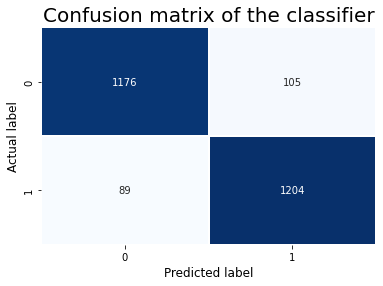

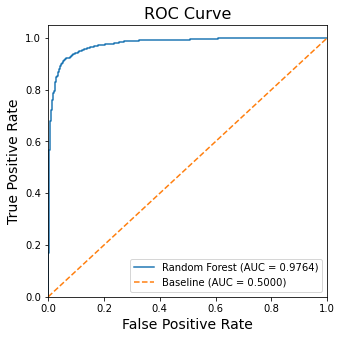

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
y_pred_prob =rf.predict_proba(x_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)
# create ROC curves

from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(5, 5))

# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Creating a pickle file

In [ ]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("Rain_prediction.pkl","wb") # name of my pickle file , wb -write
pickle.dump(rf, pickle_out)
pickle_out.close()

# loading the pickeled model
pickle_in = open("Rain_prediction.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

Rain prediction as Classification problem Study Complete

# PART 2": Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

## As a Regression problem

# Reading the Data

In [2]:
import pandas as pd
import numpy as np 
rain_data=  pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

# Checking for Null values

In [3]:
rain_data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [4]:
rain_data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


# Feature Engineering

In [5]:
rain_data["Date"] = pd.to_datetime(rain_data["Date"], format = "%Y-%m-%dT", errors = "coerce")
rain_data["Date_month"] = rain_data["Date"].dt.month
rain_data["Date_Year"] = rain_data["Date"].dt.year
rain_data["Date_day"] = rain_data["Date"].dt.day
rain_data.drop(["Date"],axis=1,inplace=True)

In [6]:
rain_data.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Date_month          0
Date_Year           0
Date_day            0
dtype: int64

# Dropping rows woth nan values in rainfall

In [7]:
rain_data.drop(rain_data[rain_data['Rainfall'].isna()].index,inplace=True)

# Mapping categorial columns

In [8]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
rain_data["WindGustDir"] = rain_data["WindGustDir"].map(windgustdir)
rain_data["WindDir9am"] = rain_data["WindDir9am"].map(winddir9am)
rain_data["WindDir3pm"] = rain_data["WindDir3pm"].map(winddir3pm)

# Label Encoding

In [9]:
# import LabelEncoder
column=['Date_month', 'Date_Year','RainToday','Location','RainTomorrow']
from sklearn.preprocessing import LabelEncoder
for col in column:
    le =LabelEncoder()
    rain_data[col]=le.fit_transform(rain_data[col].astype('str'))

In [10]:
rain_data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_Year,Date_day
0,1,13.4,22.9,0.6,NaN,NaN,4.0,44.0,5.0,3.0,...,1007.1,8.0,NaN,16.9,21.8,0,0,3,0,1
1,1,7.4,25.1,0.0,NaN,NaN,2.0,44.0,0.0,6.0,...,1007.8,NaN,NaN,17.2,24.3,0,0,3,0,2


# Imputing the missing values

In [11]:
# !pip install fancyimpute
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer

# calling the  MICE class
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
# df= mice_imputer.fit_transform(rain_data)
rain_data=pd.DataFrame(data=mice_imputer.fit_transform(rain_data), columns=rain_data.columns, index=rain_data.index)

D:\New folder\Android\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Creating average columns for wind speed,Humidity,temperature,humidity,cloud

In [12]:
rain_data['windspeed']=(rain_data['WindSpeed9am']+rain_data['WindSpeed3pm'])//2
rain_data.drop(['WindSpeed9am','WindSpeed3pm'],axis=1,inplace=True)

In [13]:
rain_data['Humidity']=(rain_data['Humidity9am']+rain_data['Humidity3pm'])//2
rain_data.drop(['Humidity9am','Humidity3pm'],axis=1,inplace=True)

In [14]:
rain_data['Temp']=(rain_data['Temp9am']+rain_data['Temp3pm'])//2
rain_data.drop(['Temp9am','Temp3pm'],axis=1,inplace=True)

In [15]:
rain_data['Pressure']=(rain_data['Pressure9am']+rain_data['Pressure3pm'])//2
rain_data.drop(['Pressure9am','Pressure3pm'],axis=1,inplace=True)

In [16]:
rain_data['Cloud']=(rain_data['Cloud9am']+rain_data['Cloud3pm'])//2
rain_data.drop(['Cloud9am','Cloud3pm'],axis=1,inplace=True)

# Removing outliers

In [17]:
# checking for z- scores

from scipy.stats import zscore
z_score=np.abs(zscore(rain_data))

# data with z score more then 3
data=rain_data[(z_score<3).all(axis=1)]

In [18]:
print(rain_data.shape)
print(data.shape)

(8185, 20)
(7741, 20)


# Checking Data-Loss

In [19]:

Data_loss_= (((8185-7741)/8185)*100)
print(Data_loss_,"%")


5.424557116676848 %


In [20]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Date_month', 'Date_Year', 'Date_day', 'windspeed',
       'Humidity', 'Temp', 'Pressure', 'Cloud'],
      dtype='object')

# Splitting Data

### performing random sampling(SMOTE) to remove skewmess in Raintoday column as predicting rainfall is pointless if there is no rain

In [21]:
features= data.drop(["RainToday"], axis=1)
target= data["RainToday"]
from sklearn.preprocessing import StandardScaler
for col in features.columns:
    SC = StandardScaler()
    features[col] = SC.fit_transform(features[col].values.reshape(-1, 1))

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

ROS = SMOTE(random_state=12)
ROS.fit(features, target)
features_resampled, target_resampled = ROS.fit_resample(features,target)
round(target_resampled.value_counts(normalize=True) * 100, 2)

0.0    50.0
1.0    50.0
Name: RainToday, dtype: float64

# Merging Data

In [22]:
features_resampled['RainToday']=0
features_resampled['RainToday']=target_resampled

# Splitting the Data

In [23]:
features= features_resampled.drop(["Rainfall"], axis=1)
target= features_resampled["Rainfall"]

# Skewness of the Data

In [24]:
features.skew().sort_values(ascending=False)

RainTomorrow     0.787647
WindGustSpeed    0.537387
Date_Year        0.452731
Evaporation      0.410623
MaxTemp          0.395193
windspeed        0.382954
WindDir9am       0.218692
Temp             0.206340
WindGustDir      0.046280
Date_day         0.009735
RainToday        0.000000
Pressure        -0.012905
Location        -0.013984
Sunshine        -0.017776
MinTemp         -0.084415
Date_month      -0.101055
WindDir3pm      -0.197722
Humidity        -0.313809
Cloud           -0.329765
dtype: float64

In [25]:
# #skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
data_power=pt.fit_transform(features)
features=pd.DataFrame(data_power,columns=features.columns)
features.skew().sort_values(ascending=False)

RainTomorrow     0.781607
Date_Year        0.085319
windspeed        0.036974
Sunshine         0.032468
WindDir9am       0.029950
WindGustSpeed    0.027303
MaxTemp          0.025138
Temp             0.021111
WindGustDir      0.019232
Pressure         0.016047
Date_day         0.003738
RainToday        0.000000
Location        -0.002580
WindDir3pm      -0.014905
MinTemp         -0.018790
Date_month      -0.021189
Humidity        -0.030726
Evaporation     -0.056516
Cloud           -0.085534
dtype: float64

# RainTommorow is a bit skewed But still we will keep it

## SCALING THE DATA

In [26]:
from sklearn.preprocessing import StandardScaler
for col in features.columns:
    SC = StandardScaler()
    features[col] = SC.fit_transform(features[col].values.reshape(-1, 1))

# Checking forMulti=collinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(features.values, i) 
               for i in range(features.shape[1])], index=features.columns)

Location          1.640631
MinTemp           9.806062
MaxTemp          24.192787
Evaporation       3.595297
Sunshine          7.862355
WindGustDir       2.002648
WindGustSpeed     4.059567
WindDir9am        1.530890
WindDir3pm        1.913447
RainTomorrow      1.667016
Date_month        1.996287
Date_Year         1.767690
Date_day          1.010687
windspeed         3.632331
Humidity          3.806783
Temp             35.306538
Pressure          1.624262
Cloud             4.976716
RainToday         1.506624
dtype: float64

In [28]:
pd.Series([variance_inflation_factor(features.drop(['Temp'],axis=1).values, i) 
               for i in range(features.drop(['Temp'],axis=1).shape[1])], index=features.drop(['Temp'],axis=1).columns)

Location         1.632269
MinTemp          6.073407
MaxTemp          7.077653
Evaporation      3.594234
Sunshine         7.859691
WindGustDir      1.995274
WindGustSpeed    3.980891
WindDir9am       1.530178
WindDir3pm       1.910174
RainTomorrow     1.661404
Date_month       1.989749
Date_Year        1.766277
Date_day         1.010590
windspeed        3.605512
Humidity         3.633133
Pressure         1.617215
Cloud            4.920005
RainToday        1.506453
dtype: float64

# Dropping Volumn Temp

In [29]:
features.drop(['Temp'],axis=1,inplace=True)

# Multicollinearity Removed

In [32]:
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def build_model(Features,target,model):
    Maximum_Accuracy=0

    test_size=[0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3]

    over_fitting=1

    for j in test_size:
        for i in range(100):
            x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)

            model.fit(x_train,y_train)
            pred= model.predict(x_test)
            acc=r2_score(y_test,pred)
            check=model.predict(x_train)
            check_acc=r2_score(y_train,check)
          
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

# Random Forest

In [58]:
build_model(features,target,RandomForestRegressor())

R-square 0.8664208886197233 Train set accuracy 0.977083027449297 Random state 0 test_size 0.2
R-square 0.8777307207782634 Train set accuracy 0.978083748820279 Random state 13 test_size 0.2


In [ ]:
### 87%

In [43]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=13)
estimator = RandomForestRegressor(random_state=42)
param_grid = {
            'max_depth': [10,50,100, None],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [100,500,1000]
             }

RF= GridSearchCV(estimator, param_grid,scoring='neg_mean_squared_error')

grid_fit = RF.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_

print("best estimator: " + str(grid_fit.best_estimator_))
print("best params: " + str(grid_fit.best_params_))
print("best score:", grid_fit.best_score_)

best estimator: RandomForestRegressor(max_depth=50, n_estimators=1000, random_state=42)
best params: {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 1000}
best score: -0.3154931616419547


In [44]:
RF_pred=rf_opt.predict(x_test)

print('R2_score:',r2_score(y_test,RF_pred))
print('mse:',metrics.mean_squared_error(y_test,RF_pred))
print('mae:',metrics.mean_absolute_error(y_test,RF_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

R2_score: 0.8771911467275642
mse: 0.2095456758702377
mae: 0.21714382710324023
rmse: 0.4577615928299771


# Conclusion: We are best results with 


In [52]:
#pickle file of the model
import pickle
# # saved the trained model in file with given name
pickle_out = open("Rain.pkl","wb") # name of my pickle file , wb -write
pickle.dump(rf_opt, pickle_out)
pickle_out.close()
# loading the pickeled model
pickle_in = open("rain.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
data=pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
data.to_csv('Rainfall_prediction.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614
Predicted,-0.382093,0.397753,1.779062,-0.374795,-0.353402,1.190818,-0.394816,-0.357664,1.077080,-0.390991,...,-0.394816,4.015757,-0.392488,0.233265,0.894951,-0.391615,-0.317934,0.269905,4.423501,2.83769
Original,-0.394941,0.395091,2.058318,-0.394941,-0.353360,1.042056,-0.394941,-0.353360,-0.145457,-0.394941,...,-0.394941,4.820437,-0.394941,0.164298,0.846985,-0.394941,-0.290989,0.145607,5.189390,2.81834
